# **Load data**

In [1]:
!git clone https://github.com/PeerapolHan/Bonsai.git

Cloning into 'Bonsai'...
remote: Enumerating objects: 2749, done.
remote: Counting objects: 100% (2749/2749), done.
remote: Compressing objects: 100% (2744/2744), done.
remote: Total 2749 (delta 4), reused 2742 (delta 2), pack-reused 0
Receiving objects: 100% (2749/2749), 18.40 MiB | 31.24 MiB/s, done.
Resolving deltas: 100% (4/4), done.


# **import Library**

In [2]:
import cv2
import os
import os.path as op
from glob import glob
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image

import pickle
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,label_binarize
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import MaxPooling2D, Conv2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16

from tensorflow import keras

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# ***Read images and Labels from folders***

In [3]:
images = []
labels = []

folders = ['/kaggle/working/Bonsai/Bonsai_styles/Bunjinji',
          '/kaggle/working/Bonsai/Bonsai_styles/Chokkan',
          '/kaggle/working/Bonsai/Bonsai_styles/Fukinagashi',
          '/kaggle/working/Bonsai/Bonsai_styles/Han Kengai',
          '/kaggle/working/Bonsai/Bonsai_styles/Hokidachi',
          '/kaggle/working/Bonsai/Bonsai_styles/Moyogi',
          '/kaggle/working/Bonsai/Bonsai_styles/Seki-joju',
          '/kaggle/working/Bonsai/Bonsai_styles/Sokan',
          '/kaggle/working/Bonsai/Bonsai_styles/Yose-ue'
         ]

def load_image_from_folder(folder):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        img = cv2.resize(img, (100, 100))
        images.append(img)
        label = folder.split('/')[-1]
        labels.append(label)
        
def convert_images(images):
    X = np.array(images)/255.0
    return X

def convert_labels(labels):
    enc = LabelEncoder()
    P = enc.fit_transform(labels)
    Y = to_categorical(P)
    return Y


for folder in folders:
    print('Reading images from path: ' + folder)
    load_image_from_folder(folder)
X = convert_images(images)
Y = convert_labels(labels)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print(X_train.shape)
print(Y_train.shape)

Reading images from path: /kaggle/working/Bonsai/Bonsai_styles/Bunjinji
Reading images from path: /kaggle/working/Bonsai/Bonsai_styles/Chokkan
Reading images from path: /kaggle/working/Bonsai/Bonsai_styles/Fukinagashi
Reading images from path: /kaggle/working/Bonsai/Bonsai_styles/Han Kengai
Reading images from path: /kaggle/working/Bonsai/Bonsai_styles/Hokidachi
Reading images from path: /kaggle/working/Bonsai/Bonsai_styles/Moyogi
Reading images from path: /kaggle/working/Bonsai/Bonsai_styles/Seki-joju
Reading images from path: /kaggle/working/Bonsai/Bonsai_styles/Sokan
Reading images from path: /kaggle/working/Bonsai/Bonsai_styles/Yose-ue
(1890, 100, 100, 3)
(1890, 9)


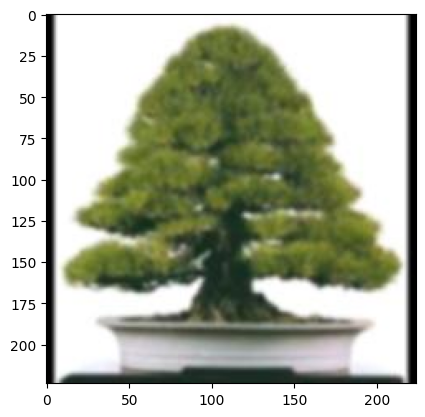

In [4]:
pic = Image.open('/kaggle/working/Bonsai/Bonsai_styles/Chokkan/aug_115img_2.jpeg')
plt.imshow(pic)
plt.show()

In [195]:
len(X_train),len(Y_train),len(Y_test),len(X_test)

(1890, 1890, 810, 810)

# VGG MODEL

In [5]:
vgg_model = VGG16(weights='imagenet', input_shape=(100,100,3), include_top=False)

vgg_model.trainable = False

print(vgg_model.summary())

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                              

In [6]:
inputs = keras.Input(shape=(100, 100, 3))

x = vgg_model(inputs, training=False)

x = keras.layers.GlobalAveragePooling2D()(x)               
x = keras.layers.Dense(200, activation='relu')(x)
outputs = keras.layers.Dense(9, activation='softmax')(x)  

model_v = keras.Model(inputs, outputs)  
print(model_v.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 200)               102600    
                                                                 
 dense_1 (Dense)             (None, 9)                 1809      
                                                                 
Total params: 14819097 (56.53 MB)
Trainable params: 104409 (407.85 KB)
Non-trainable params: 14714688 (56.13 MB)
______________

In [ ]:
model_v.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_v.fit(X_train, Y_train, epochs=60)

Epoch 1/60

26/60 [============>.................] - ETA: 2:05 - loss: 2.1760 - accuracy: 0.1382

*****check point**
**ถ้าใช้ h5 ไม่ต้องรันข้างล่าง**

In [7]:
vgg_model.get_layer('block5_conv1').trainable = True
vgg_model.get_layer('block5_conv2').trainable = True
vgg_model.get_layer('block5_conv3').trainable = True
opt = keras.optimizers.Adam(learning_rate = 0.001)
#opt = SGD(learning_rate = 0.0001 )#1e-5
model_v.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

hist=model_v.fit(X_train, Y_train, validation_split = 0.3, epochs =60)

Epoch 1/60
42/42 [==============================] - 9s 92ms/step - loss: 2.1167 - accuracy: 0.2147 - val_loss: 1.9840 - val_accuracy: 0.3086
Epoch 2/60
42/42 [==============================] - 2s 45ms/step - loss: 1.8639 - accuracy: 0.3583 - val_loss: 1.8073 - val_accuracy: 0.3757
Epoch 3/60
42/42 [==============================] - 2s 45ms/step - loss: 1.6949 - accuracy: 0.4195 - val_loss: 1.6778 - val_accuracy: 0.4286
Epoch 4/60
42/42 [==============================] - 2s 45ms/step - loss: 1.5529 - accuracy: 0.4868 - val_loss: 1.5952 - val_accuracy: 0.4603
Epoch 5/60
42/42 [==============================] - 2s 45ms/step - loss: 1.4408 - accuracy: 0.5525 - val_loss: 1.5028 - val_accuracy: 0.4885
Epoch 6/60
42/42 [==============================] - 2s 45ms/step - loss: 1.3418 - accuracy: 0.5624 - val_loss: 1.4578 - val_accuracy: 0.5079
Epoch 7/60
42/42 [==============================] - 2s 46ms/step - loss: 1.2609 - accuracy: 0.5888 - val_loss: 1.3710 - val_accuracy: 0.5485
Epoch 8/60
42

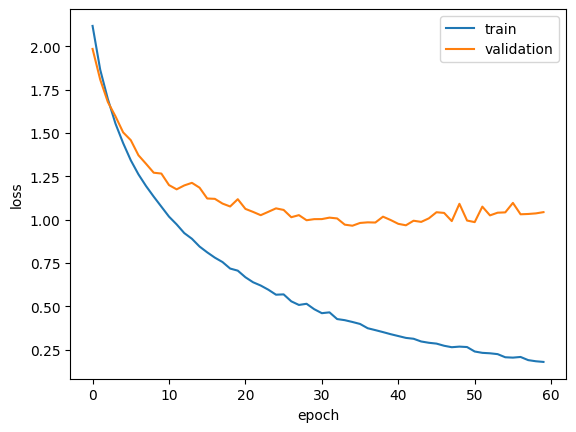

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','validation'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# **Save model**

***pickle***

In [76]:
Pkl_Filename = "Bonsai_classification_VGG16Model.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model_v, file)

***check point***
ถ้าไม่ใช้ไม่ต้องรัน

In [ ]:
check_point = ModelCheckpoint(
    filepath= 'vgg-{epoch:03d}-{val_loss:03f}.h5',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

vgg_model.get_layer('block5_conv1').trainable = True
vgg_model.get_layer('block5_conv2').trainable = True
vgg_model.get_layer('block5_conv3').trainable = True

sgd = SGD(learning_rate = 1e-5)
model_v.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

hist=model_v.fit(X_train, Y_train, validation_split = 0.3, epochs=60,callbacks=[check_point])

# Performance evaluate

26/26 [==============================] - 1s 33ms/step - loss: 1.0648 - accuracy: 0.6765
 loss:  [1.064763069152832, 0.6765432357788086]
1/1 [==============================] - 0s 24ms/step
input :  [0. 0. 0. ... 0. 0. 0.]
Predict output :  [[2.9976064e-01 1.1407041e-03 1.3587502e-01 1.9193143e-02 2.1658995e-04
  3.5925204e-01 6.1835102e-03 1.7828372e-01 9.4763280e-05]]  or  5 or Moyogi
Actual Output:  [1. 0. 0. 0. 0. 0. 0. 0. 0.]  or  0 or Bunjinji


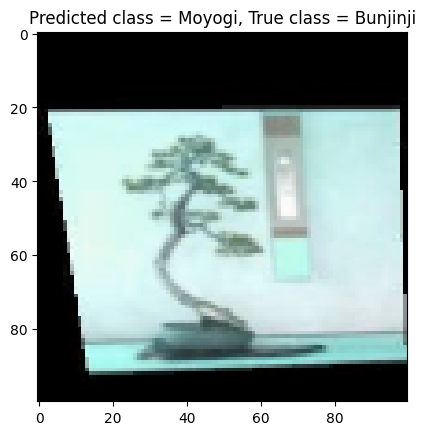

In [93]:
# Test model 
target_names = ['Bunjinji','Chokkan','Fukinagashi','Han Kengai','Hokidachi','Moyogi','Seki-joju','Sokan','Yose-ue']
loss = model_v.evaluate(X_test, Y_test)
print(' loss: ', loss)
index = 12

x_test = X_test[index]
x_test = x_test.reshape(1,100,100,3)
testPred = model_v.predict(x_test)
testPredict = np.argmax(testPred, axis=1)
testActual = np.argmax(Y_test, axis=1)

testPredictAnsNum = int(''.join(map(str,testPredict.reshape(-1))))
testPredictAnsStr = target_names[int(''.join(map(str,testPredict.reshape(-1))))]
print('input : ', x_test.reshape(-1))
print('Predict output : ', testPred , ' or ',testPredictAnsNum,'or', testPredictAnsStr)
print('Actual Output: ', Y_test[index] , ' or ', testActual[index], 'or' , target_names[testActual[index]])

plt.title("Predicted class = {}, True class = {}".format(testPredictAnsStr, target_names[testActual[index]]))
plt.imshow(x_test.squeeze(0))
plt.show()

**Precision / Recall and F-score**

In [185]:
target_names = ['Bunjinji','Chokkan','Fukinagashi','Han Kengai','Hokidachi','Moyogi','Seki-joju','Sokan','Yose-ue']

model_v.fit(X_train, Y_train) 
ypred = model_v.predict(X_test)
ypred = np.argmax(ypred, axis=1)
ytrue = np.argmax(Y_test, axis=1)
print(classification_report(ytrue, ypred, target_names=target_names))  

26/26 [==============================] - 1s 31ms/step
              precision    recall  f1-score   support

    Bunjinji       0.77      0.69      0.73        89
     Chokkan       0.72      0.66      0.69        79
 Fukinagashi       0.44      0.49      0.46        96
  Han Kengai       0.62      0.58      0.60        78
   Hokidachi       0.95      0.85      0.90        89
      Moyogi       0.57      0.64      0.60        88
   Seki-joju       0.56      0.76      0.65        92
       Sokan       0.64      0.44      0.52       101
     Yose-ue       0.77      0.84      0.80        98

    accuracy                           0.66       810
   macro avg       0.67      0.66      0.66       810
weighted avg       0.67      0.66      0.66       810

